# Stock Price Prediction Using RNNs

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam

### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

#### **1.1.1** <font color =red> [5 marks] </font>
Create the function to join DataFrames and use it to combine the four datasets.

In [ ]:
# Define a function to load data and aggregate them

def combine_datasets(file_paths):
    data_frames = []
    for file in file_paths:
        data_frames.append(pd.read_csv(file))
    df_all = pd.concat(data_frames)
    df_all['Date'] = pd.to_datetime(df_all['Date'])
    df_all = df_all.sort_values('Date')

    return df_all

In [ ]:
# Specify the names of the raw data files to be read and use the aggregation function to read the files
file_paths = ['/AMZN_stocks_data.csv', '/GOOGL_stocks_data.csv', '/IBM_stocks_data.csv', '/MSFT_stocks_data.csv']
df_all = combine_datasets(file_paths)
print(df_all.head())

        Date    Open    High     Low   Close    Volume   Name
0 2006-01-03   47.47   47.85   46.25   47.58   7582127   AMZN
0 2006-01-03   26.25   27.00   26.10   26.84  79974418   MSFT
0 2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
0 2006-01-03   82.45   82.55   80.81   82.06  11715200    IBM
1 2006-01-04   26.77   27.08   26.77   26.97  57975661   MSFT


In [ ]:
# View specifics of the data
print(df_all.head())

# View the summary statistics of numerical columns
print(df_all.describe())

# View information about the DataFrame including data types, non-null counts, and memory usage
print(df_all.info())

        Date    Open    High     Low   Close    Volume   Name
0 2006-01-03   47.47   47.85   46.25   47.58   7582127   AMZN
0 2006-01-03   26.25   27.00   26.10   26.84  79974418   MSFT
0 2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
0 2006-01-03   82.45   82.55   80.81   82.06  11715200    IBM
1 2006-01-04   26.77   27.08   26.77   26.97  57975661   MSFT
                                Date          Open          High  \
count                          12077  12076.000000  12077.000000   
mean   2012-01-01 18:44:08.803510784    227.387118    229.422254   
min              2006-01-03 00:00:00     15.200000     15.620000   
25%              2008-12-31 00:00:00     54.930000     55.660000   
50%              2011-12-30 00:00:00    158.795000    160.410000   
75%              2015-01-02 00:00:00    281.405000    284.500000   
max              2017-12-29 00:00:00   1204.880000   1213.410000   
std                              NaN    236.938260    238.568485   

               

#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

In [ ]:
# Handle Missing Values
print(df_all.isnull().sum())

Date      0
Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64


### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

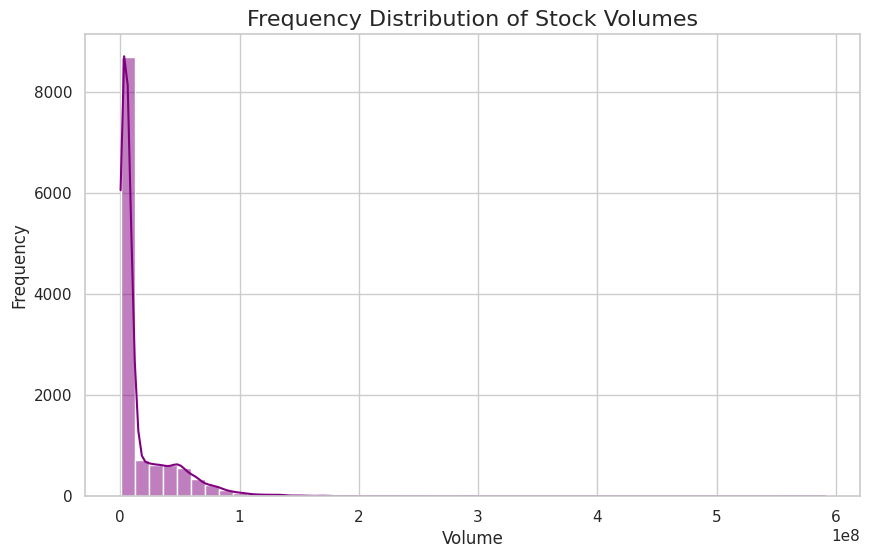

In [ ]:
# Frequency distribution of volumes

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_all['Volume'], bins=50, kde=True, color='purple')
plt.title('Frequency Distribution of Stock Volumes', fontsize=16)
plt.xlabel('Volume', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<ipython-input-51-441509fd94e6>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_close.fillna(method='ffill', inplace=True)


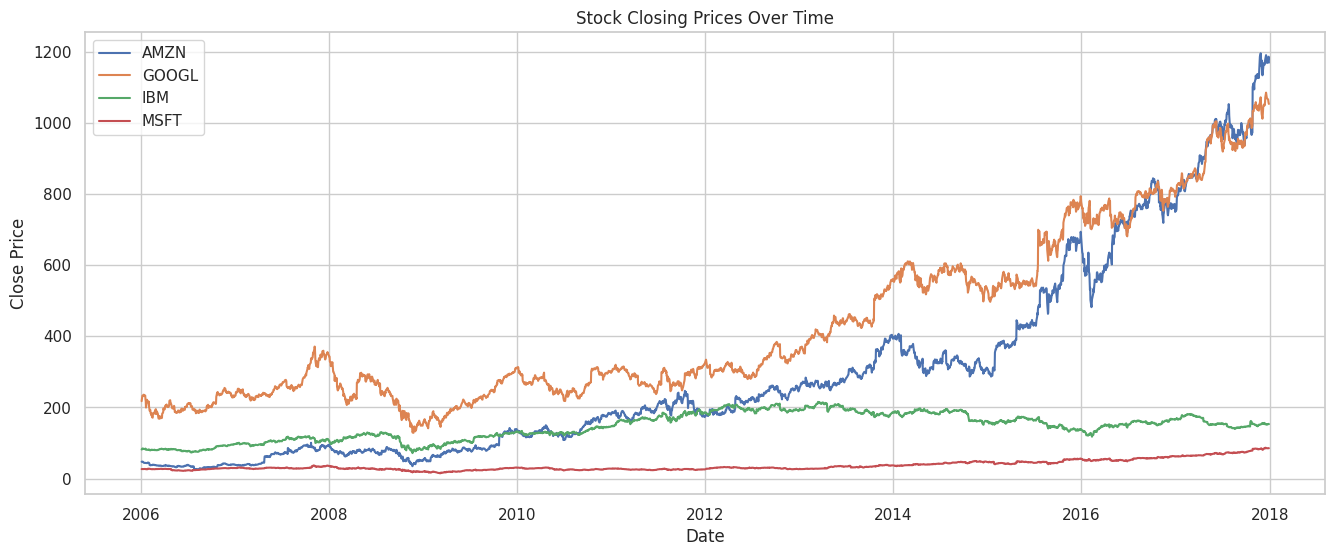

In [ ]:
# Stock volume variation over time
pivot_close = df_all.pivot(index='Date', columns='Name', values='Close')
pivot_close.fillna(method='ffill', inplace=True)
plt.figure(figsize=(16,6))
for company in pivot_close.columns:
    plt.plot(pivot_close.index, pivot_close[company], label=company)
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

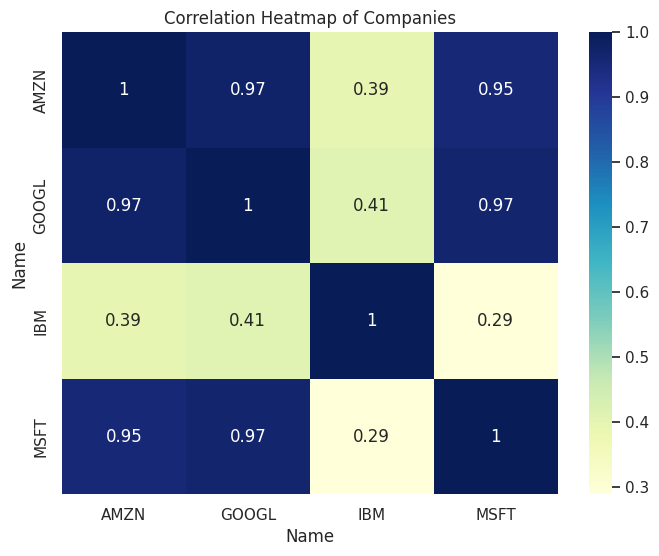

In [ ]:
# Analyse correlations
plt.figure(figsize=(8,6))
sns.heatmap(pivot_close.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap of Companies')
plt.show()

### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

**Hint:** If we use a window of size 3, in the first window, the rows `[0, 1, 2]` will be present and will be used to predict the value of `CloseAMZN` in row `3`. In the second window, rows `[1, 2, 3]` will be used to predict `CloseAMZN` in row `4`.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

In [ ]:
# Define a function that divides the data into windows and generates target variable values for each window
def create_windowed_data(data, column_names, window_size=3, step_size=1, target_names=None):
    """
    Args:
    - data: The scaled input data (all companies).
    - column_names: The column names (companies) before scaling.
    - window_size: Size of the time window for each sequence.
    - step_size: Stride length for the windows (i.e., how much to move between windows).
    - target_names: List of stock names (column names) to predict.

    Returns:
    - X: Input data (windowed).
    - y: Output data (target companies' close prices).
    """
    X, y = [], []
    target_idx = [column_names.index(name) for name in target_names]

    for i in range(window_size, len(data), step_size):
        X.append(data[i-window_size:i])  # Input data: windowed sequence
        y.append(data[i, target_idx])  # Target data: actual values for the next time step for selected companies

    return np.array(X), np.array(y)


#### **1.3.2** <font color =red> [3 marks] </font>
Create a function to scale the data.

Define a function that will scale the data.

For scaling, we have to look at the whole length of data to find max/min values or standard deviations and means. If we scale the whole data at once, this will lead to data leakage in the windows. This is not necessarily a problem if the model is trained on the complete data with cross-validation.

One way to scale when dealing with windowed data is to use the `partial_fit()` method.
```
scaler.partial_fit(window)
scaler.transform(window)
```
You may use any other suitable way to scale the data properly. Arrive at a reasonable way to scale your data.

In [ ]:
# Define a function that scales the windowed data
def scale_data(data, scaler=None):
    if scaler is None:
        scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    return scaled_data, scaler

Next, define the main function that will call the windowing and scaling helper functions.

The input parameters for this function are:
- The joined master data set
- The names of the stocks that we wish to predict the *Close* prices for
- The window size
- The window stride
- The train-test split ratio

The outputs from this function are the scaled dataframes:
- *X_train*
- *y_train*
- *X_test*
- *y_test*

#### **1.3.3** <font color =red> [3 marks] </font>
Define a function to create windows of `window_size` and split the windowed data in to training and validation sets.

The function can take arguments such as list of target names, window size, window stride and split ratio. Use the windowing function here to make windows in the data and then perform scaling and train-test split.

In [ ]:
# Define a function to create input and output data points from the master DataFrame
def create_train_test_split(data, target_names, window_size=3, step_size=1, split_ratio=0.8):
    """
    Args:
    - data: The DataFrame containing all the stock data.
    - target_names: List of stock names (column names) to predict.
    - window_size: Size of the time window for each sequence.
    - step_size: Stride length for the windows.
    - split_ratio: Ratio for the train-test split.

    Returns:
    - X_train: Training input data.
    - X_test: Testing input data.
    - y_train: Training output data.
    - y_test: Testing output data.
    - scaler: The fitted scaler.
    """
    pivot_close = data.pivot(index='Date', columns='Name', values='Close')
    pivot_close.fillna(method='ffill', inplace=True)

    column_names = pivot_close.columns.tolist()
    scaled_data, scaler = scale_data(pivot_close)

    X, y = create_windowed_data(scaled_data, column_names, window_size, step_size, target_names)

    split = int(len(X) * split_ratio)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    return X_train, X_test, y_train, y_test, scaler

We can now use these helper functions to create our training and testing data sets. But first we need to decide on a length of windows. As we are doing time series prediction, we want to pick a sequence that shows some repetition of patterns.

For selecting a good sequence length, some business understanding will help us. In financial scenarios, we can either work with business days, weeks (which comprise of 5 working days), months, or quarters (comprising of 13 business weeks). Try looking for some patterns for these periods.

#### **1.3.4** <font color =red> [2 marks] </font>
Identify an appropriate window size.

For this, you can use plots to see how target variable is varying with time. Try dividing it into parts by weeks/months/quarters.

<ipython-input-56-244a0120c0f3>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = pivot_close.resample('M').mean()
<ipython-input-56-244a0120c0f3>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = pivot_close.resample('Q').mean()


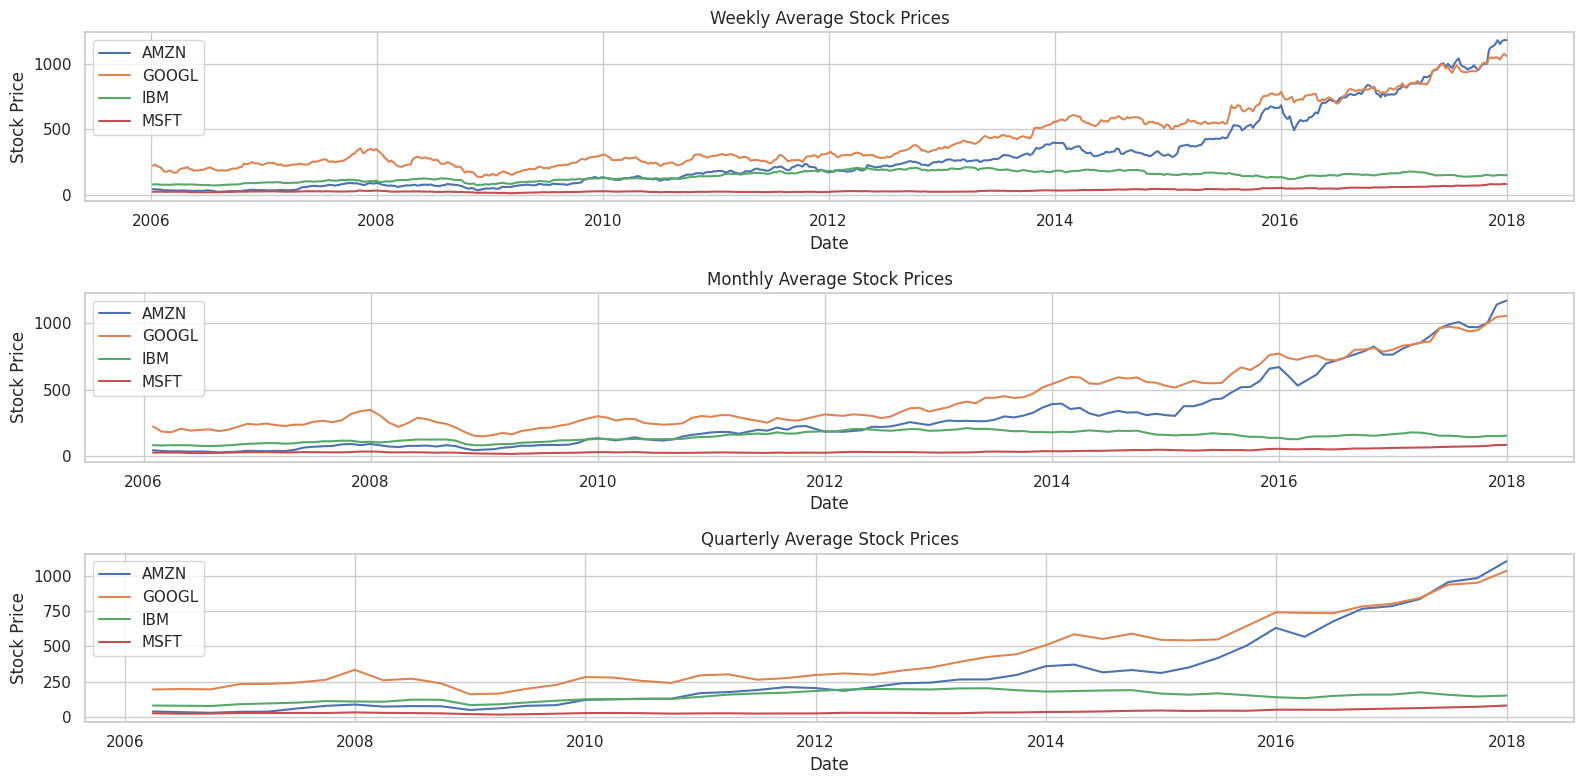

In [ ]:
# Checking for patterns in different sequence lengths
pivot_close = df_all.pivot(index='Date', columns='Name', values='Close')
weekly_data = pivot_close.resample('W').mean()
monthly_data = pivot_close.resample('M').mean()
quarterly_data = pivot_close.resample('Q').mean()

# Plotting
plt.figure(figsize=(16, 8))

# Plotting weekly data
plt.subplot(3, 1, 1)
for company in weekly_data.columns:
    plt.plot(weekly_data.index, weekly_data[company], label=company)
plt.title('Weekly Average Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Plotting monthly data
plt.subplot(3, 1, 2)
for company in monthly_data.columns:
    plt.plot(monthly_data.index, monthly_data[company], label=company)
plt.title('Monthly Average Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Plotting quarterly data
plt.subplot(3, 1, 3)
for company in quarterly_data.columns:
    plt.plot(quarterly_data.index, quarterly_data[company], label=company)
plt.title('Quarterly Average Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

plt.tight_layout()
plt.show()

#### **1.3.5** <font color =red> [2 marks] </font>
Call the functions to create testing and training instances of predictor and target features.

In [ ]:
# Create data instances from the master data frame using decided window size and window stride
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(pivot_close)
window_size = 7
step_size = 1
target_names = ['AMZN']

# Create windowed data
X, y = create_windowed_data(scaled_data, pivot_close.columns.tolist(), window_size=window_size, step_size=step_size, target_names=target_names)


In [ ]:
# Check the number of data points generated
print(f"Number of input data points (X): {X.shape[0]}")
print(f"Number of target data points (y): {y.shape[0]}")

Number of input data points (X): 3013
Number of target data points (y): 3013


**Check if the training and testing datasets are in the proper format to feed into neural networks.**

In [ ]:
# Check if the datasets are compatible inputs to neural networks

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


target_names = ['AMZN']
X_train, X_test, y_train, y_test, scaler = create_train_test_split(df_all, target_names, window_size=3, step_size=1, split_ratio=0.8)

print(f"Training Data Shape (X): {X_train.shape}, Training Target Shape (y): {y_train.shape}")
print(f"Test Data Shape (X): {X_test.shape}, Test Target Shape (y): {y_test.shape}")

Shape of X: (3013, 7, 4)
Shape of y: (3013, 1)
Training Data Shape (X): (2413, 3, 4), Training Target Shape (y): (2413, 1)
Test Data Shape (X): (604, 3, 4), Test Target Shape (y): (604, 1)


<ipython-input-55-906e790ff69d>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_close.fillna(method='ffill', inplace=True)


## **2 RNN Models** <font color =red> [20 marks] </font>

In this section, we will:
- Define a function that creates a simple RNN
- Tune the RNN for different hyperparameter values
- View the performance of the optimal model on the test data

### **2.1 Simple RNN Model** <font color =red> [10 marks] </font>

#### **2.1.1** <font color =red> [3 marks] </font>
Create a function that builds a simple RNN model based on the layer configuration provided.

In [ ]:
# Create a function that creates a simple RNN model according to the model configuration arguments

def create_simple_rnn_model(input_shape, output_dim, units=50, activation='tanh', learning_rate=0.001):
    model = Sequential()
    model.add(SimpleRNN(units=units, activation=activation, input_shape=input_shape))
    model.add(Dense(output_dim))
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

#### **2.1.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [ ]:
# Find an optimal configuration of simple RNN
unit_options = [32, 50, 64]
batch_size_options = [16, 32]
epoch_options = [20, 30]
learning_rate_options = [0.001, 0.0005]
results = []

for units, batch_size, epochs, learning_rate in itertools.product(unit_options, batch_size_options, epoch_options, learning_rate_options):
    print(f"Training model with units={units}, batch_size={batch_size}, epochs={epochs}, learning_rate={learning_rate}")

    model = create_simple_rnn_model(
        input_shape=(X_train.shape[1], X_train.shape[2]),
        output_dim=1,
        units=units,
        activation='tanh',
        learning_rate=learning_rate
    )

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        verbose=0
    )

    val_loss = min(history.history['val_loss'])
    results.append((units, batch_size, epochs, learning_rate, val_loss))

Training model with units=32, batch_size=16, epochs=20, learning_rate=0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model with units=32, batch_size=16, epochs=20, learning_rate=0.0005
Training model with units=32, batch_size=16, epochs=30, learning_rate=0.001
Training model with units=32, batch_size=16, epochs=30, learning_rate=0.0005
Training model with units=32, batch_size=32, epochs=20, learning_rate=0.001
Training model with units=32, batch_size=32, epochs=20, learning_rate=0.0005
Training model with units=32, batch_size=32, epochs=30, learning_rate=0.001
Training model with units=32, batch_size=32, epochs=30, learning_rate=0.0005
Training model with units=50, batch_size=16, epochs=20, learning_rate=0.001
Training model with units=50, batch_size=16, epochs=20, learning_rate=0.0005
Training model with units=50, batch_size=16, epochs=30, learning_rate=0.001
Training model with units=50, batch_size=16, epochs=30, learning_rate=0.0005
Training model with units=50, batch_size=32, epochs=20, learning_rate=0.001
Training model with units=50, batch_size=32, epochs=20, learning_rate=0.0005
Train

In [ ]:
# Find the best configuration based on evaluation metrics
results_df = pd.DataFrame(results, columns=['units', 'batch_size', 'epochs', 'learning_rate', 'val_loss'])
best_config = results_df.loc[results_df['val_loss'].idxmin()]
print("\nBest configuration found:")
print(best_config)


Best configuration found:
units            64.000000
batch_size       32.000000
epochs           30.000000
learning_rate     0.000500
val_loss          0.000288
Name: 23, dtype: float64


#### **2.1.3** <font color =red> [3 marks] </font>
Run for optimal Simple RNN Model and show final results.

In [ ]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model

best_units = int(best_config['units'])
best_batch_size = int(best_config['batch_size'])
best_epochs = int(best_config['epochs'])
best_learning_rate = best_config['learning_rate']

final_model = create_simple_rnn_model(
    input_shape=(X_train.shape[1], X_train.shape[2]),
    output_dim=1,
    units=best_units,
    activation='tanh',
    learning_rate=best_learning_rate
)

final_history = final_model.fit(
    X_train, y_train,
    epochs=best_epochs,
    batch_size=best_batch_size,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0307 - val_loss: 0.1497
Epoch 2/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0818
Epoch 3/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3545e-04 - val_loss: 0.0474
Epoch 4/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6762e-04 - val_loss: 0.0394
Epoch 5/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9617e-04 - val_loss: 0.0219
Epoch 6/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2200e-04 - val_loss: 0.0185
Epoch 7/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2050e-05 - val_loss: 0.0136
Epoch 8/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0254e-04 - val_loss: 0.0097
Epoch 9/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5478e-05 - val_loss: 0.0085
Epoch 10/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.7531e-05 - val_loss: 0.0075
Epoch 11/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5877e-05 - val_loss: 0.0075
Epoch 12/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

Plotting the actual vs predicted values

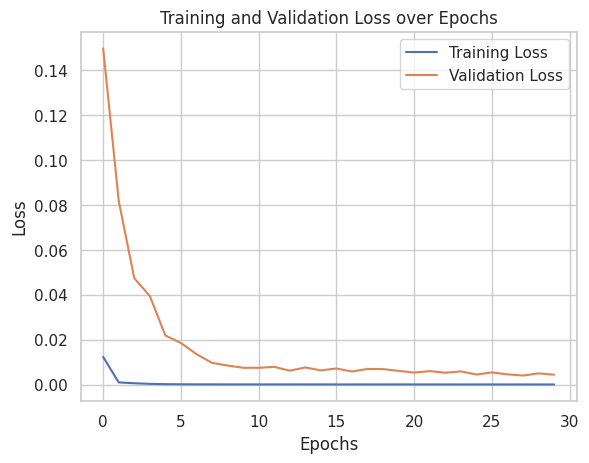

In [ ]:
# Predict on the test data and plot
plt.plot(final_history.history['loss'], label='Training Loss')
plt.plot(final_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

In [ ]:
# Compute the performance of the model on the testing data set
test_loss = final_model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal Test Loss: {test_loss:.4f}")


Final Test Loss: 0.0044


### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

#### **2.2.1** <font color =red> [3 marks] </font>
Create a function that builds an advanced RNN model with tunable hyperparameters.

In [ ]:
# # Define a function to create a model and specify default values for hyperparameters

def build_lstm_model(input_shape=None, output_dim=None, units=50, activation='tanh', learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=input_shape))
    model.add(Dense(output_dim))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

#### **2.2.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [ ]:
# Find an optimal configuration

model_type = 'LSTM'
units = 50
activation = 'tanh'
learning_rate = 0.001
batch_size = 32
epochs = 30

#### **2.2.3** <font color =red> [3 marks] </font>
Run for optimal RNN Model and show final results.

In [ ]:
# Create the model with a combination of potentially optimal hyperparameter values and retrain the model

# Create a scaler specific to the 'AMZN' column
amzn_scaler = MinMaxScaler()
amzn_scaler.fit(pivot_close[['AMZN']])  # Fit on the 'AMZN' column

# Train the model
final_model = build_lstm_model(
    input_shape=(X_train.shape[1], X_train.shape[2]),
    output_dim=y_train.shape[1],
    units=units,
    activation=activation,
    learning_rate=learning_rate
)
final_history = final_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0060 - val_loss: 0.0740
Epoch 2/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2445e-04 - val_loss: 0.0191
Epoch 3/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.6877e-04 - val_loss: 0.0099
Epoch 4/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.0120e-04 - val_loss: 0.0014
Epoch 5/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0800e-04 - val_loss: 4.3211e-04
Epoch 6/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.9789e-05 - val_loss: 0.0026
Epoch 7/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.6980e-05 - val_loss: 0.0046
Epoch 8/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.7718e-05 - val_loss: 0.0030
Epoch 9/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.4947e-05 - val_loss: 0.0044
Epoch 10/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0765e-05 - val_loss: 0.0045
Epoch 11/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8556e-05 - val_loss: 0.0060
Epoch 12/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s

In [ ]:
# Compute the performance of the model on the testing data set
y_pred = final_model.predict(X_test)
predicted_prices = amzn_scaler.inverse_transform(y_pred)
true_prices = amzn_scaler.inverse_transform(y_test)

# Calculate MSE
mse = mean_squared_error(true_prices, predicted_prices)
print(f"Test MSE ({model_type}): {mse:.6f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Test MSE (LSTM): 928.164475


Plotting the actual vs predicted values

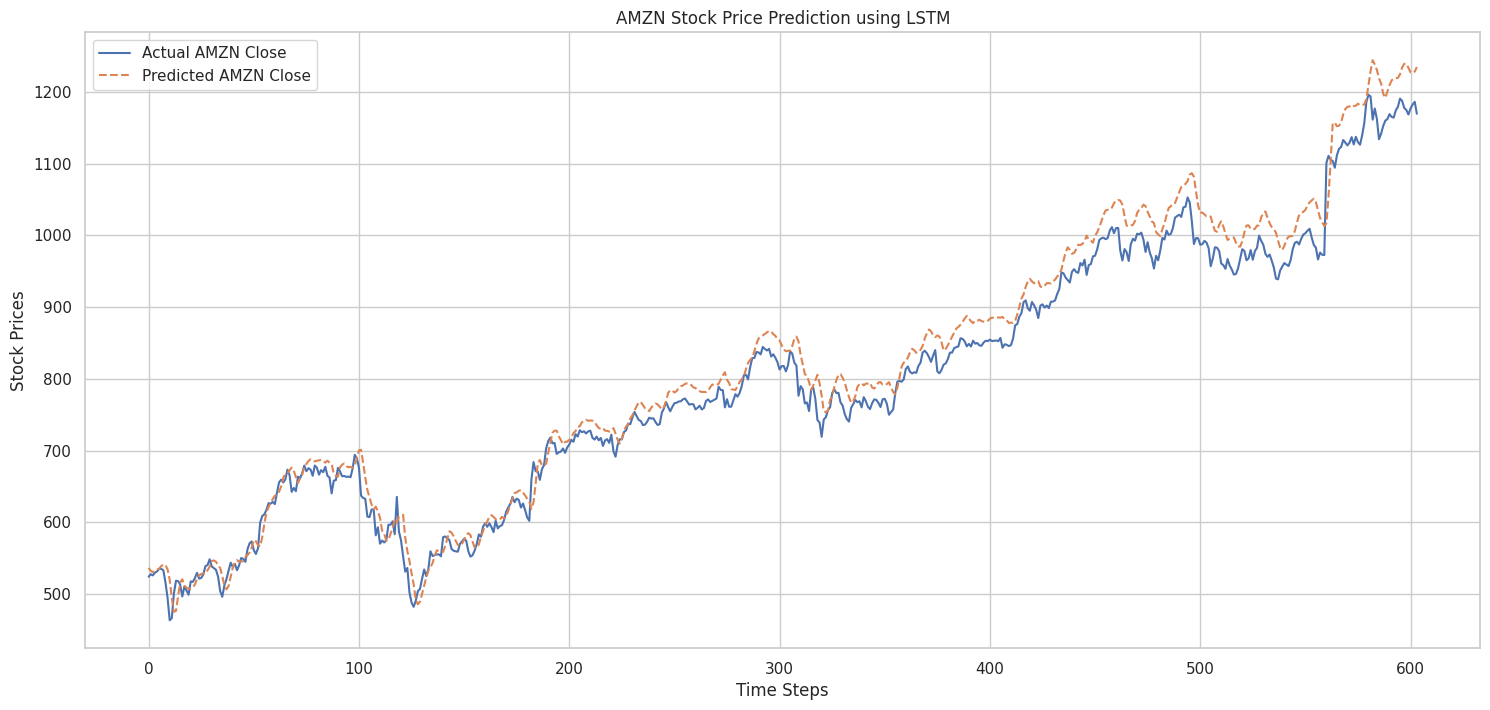

In [ ]:
# Predict on the test data
plt.figure(figsize=(18,8))
plt.plot(true_prices, label="Actual AMZN Close")
plt.plot(predicted_prices, '--', label="Predicted AMZN Close")
plt.title(f'AMZN Stock Price Prediction using {model_type}')
plt.xlabel('Time Steps')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

## **3 Predicting Multiple Target Variables** <font color =red> [OPTIONAL] </font>

In this section, we will use recurrent neural networks to predict stock prices for more than one company.

### **3.1 Data Preparation**

#### **3.1.1**
Create testing and training instances for multiple target features.

You can take the closing price of all four companies to predict here.

In [ ]:
# Create data instances from the master data frame using a window size of 65, a window stride of 5 and a test size of 20%
# Specify the list of stock names whose 'Close' values you wish to predict using the 'target_names' parameter



In [ ]:
# Check the number of data points generated



### **3.2 Run RNN Models**

#### **3.2.1**
Perform hyperparameter tuning to find the optimal network configuration for Simple RNN model.

In [ ]:
# Find an optimal configuration of simple RNN



In [ ]:
# Find the best configuration



In [ ]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the



In [ ]:
# Compute the performance of the model on the testing data set



In [ ]:
# Plotting the actual vs predicted values for all targets



#### **3.2.2**
Perform hyperparameter tuning to find the optimal network configuration for Advanced RNN model.

In [ ]:
# Find an optimal configuration of advanced RNN



In [ ]:
# Find the best configuration



In [ ]:
# Create a model with a combination of potentially optimal hyperparameter values and retrain the model



In [ ]:
# Compute the performance of the model on the testing data set



In [ ]:
# Plotting the actual vs predicted values for all targets



## **4 Conclusion** <font color =red> [5 marks] </font>

### **4.1 Conclusion and insights** <font color =red> [5 marks] </font>

#### **4.1.1** <font color =red> [5 marks] </font>
Conclude with the insights drawn and final outcomes and results.

**Model Performance Overview:**
* The Simple RNN model achieved a Final Test Loss of 0.0044 during training.

* The LSTM model, aimed at capturing longer-term dependencies in stock data, produced a Test MSE of 928.164475.

* While the LSTM model effectively identified general trends in AMZN stock prices, it struggled with accurately predicting sharp fluctuations and volatile movements.


**Observations from the Training Process:**
* The Simple RNN model minimized training error efficiently; however, slight gaps between training and validation losses indicated minor overfitting.

* The LSTM model demonstrated better capability to capture broader trends.